# POLYNOMIAL REGRESSION (nonlinear regression)

## INTRODUCTION

    First of all, i have to write my process.
    I follow five instruction for solving any data science problem:

    - Define the problem

    - Prepare Data / Data Preprocessing
        Get Data
        Data Cleaning/Wrangling
        Statistical Analysis
        Data Visualization
        Feature Selection/Scaling
        Data Transformation

    - Check Algorithms
        Train & Test Data
        Apply ML Algorithm
        Test
        Perform Measure
        Evaulate accuarcy of different algorithm

    - Improve Results
        Algorithm Tuning

    - Present Results
        Conclusion
        Presentation

## LOG

In [1]:
# Log
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='ploy_reg.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

## IMPORT LIBRARY

In [2]:
#import the libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sns.set()

## IMPORT DATA

In [3]:
#import the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head(10)
dataset.shape

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


(10, 3)

In [4]:
# information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [5]:
#show independent variable
X = dataset.iloc[:,1:2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [1]:
#show dependent variable
y = dataset.iloc[:, 2].values
y

NameError: name 'dataset' is not defined

## MISSING DATA

In [7]:
#missing the data
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [8]:
# taking care of missing data

# first option is removed this line
# second option is replace mean, strategy=mean
# third option is replace median, strategy=median
# fourth option is replace most frequent (like single mode), strategy=most_frequent
# axis=0 for the column based, axis=1 for the row based

#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values='NaN', strategy='mean', axis=0) #help(Imputer)
#imputer = imputer.fit(X[:, 1:3])
#X[:,1:3] = imputer.transform(X[:, 1:3])
#X

In [9]:
#help(imputer)

## CATEGORICAL DATA

In [10]:
# No categorical data

#handle the categorical data with LabelEncoder abd OneHotEncoder
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelEncoder = LabelEncoder()
#X[:,3] = labelEncoder.fit_transform(X[:, 3])
#oneHotEncoder = OneHotEncoder(categorical_features = [3])
#X = oneHotEncoder.fit_transform(X).toarray()
#X

In [11]:
#avoid dummy variables trap, so eliminate one columns that it is into the dummy variables
#X = X[:, 1:]
#X

## STATISTIC

In [12]:
# some statistic information
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## VISUALIZATION

In [13]:
# time series analysis
# histogram
# density
# pdf
# cdf
# heatmap or corr matrix

## CORRELATION

In [14]:
# correlation
corr_all = dataset.corr()
corr_all

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


## SPLIT DATA

In [15]:
# This is unnecessary because our dataset is very small

#splitting dataset as test and train
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#X_train
#X_test
#y_train
#y_test

## FEATURES SCALE

In [16]:
#This is unnecessary because if you want to do scaling, coefficient is changed by the model

#features scale
pass 

"""
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
"""

'\nfrom sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\n'

## FIT THE MODEL

In [17]:
#fitting the model

#linear regression
from sklearn.linear_model import LinearRegression

lin_regressor_1 = LinearRegression()
lin_regressor_2 = LinearRegression()
lin_regressor_3 = LinearRegression()
lin_regressor_4 = LinearRegression()

lin_regressor_1.fit(X, y)
y_hat_1 = lin_regressor_1.predict(X)

y_hat_1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [18]:
#fitting the model

#polynomial regression
from sklearn.preprocessing import PolynomialFeatures

poly_reg_2 = PolynomialFeatures(degree=2)
poly_reg_3 = PolynomialFeatures(degree=3)
poly_reg_4 = PolynomialFeatures(degree=4)

X_poly_2 = poly_reg_2.fit_transform(X)
X_poly_3 = poly_reg_3.fit_transform(X)
X_poly_4 = poly_reg_4.fit_transform(X)

lin_regressor_2.fit(X_poly_2, y)
lin_regressor_3.fit(X_poly_3, y)
lin_regressor_4.fit(X_poly_4, y)

y_hat_2 = lin_regressor_2.predict(X_poly_2)
y_hat_3 = lin_regressor_3.predict(X_poly_3)
y_hat_4 = lin_regressor_4.predict(X_poly_4)

y_hat_2
y_hat_3
y_hat_4

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

array([ 14902.09790211,  78759.90675991,  94960.37296037,  88223.77622377,
        83270.3962704 , 104820.51282051, 177594.40559441, 326312.35431236,
       575694.63869464, 950461.53846153])

array([ 53356.64335681,  31759.90675996,  58642.19114221,  94632.86713289,
       121724.94172498, 143275.05827508, 184003.49650349, 289994.17249411,
       528694.63869452, 988916.08391594])

## VISUALIZATION

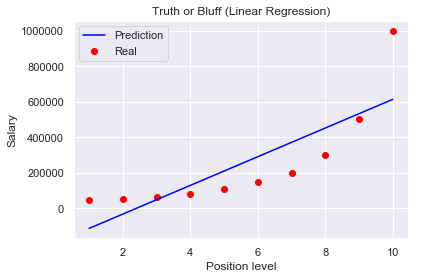

In [19]:
# Visualising the Linear Regression results
_=plt.scatter(X, y, color='red', label='Real')
_=plt.plot(X, y_hat_1, color='blue', label='Prediction')
_=plt.title('Truth or Bluff (Linear Regression)')
_=plt.xlabel('Position level')
_=plt.ylabel('Salary')
_=plt.legend(loc='best')
plt.show();

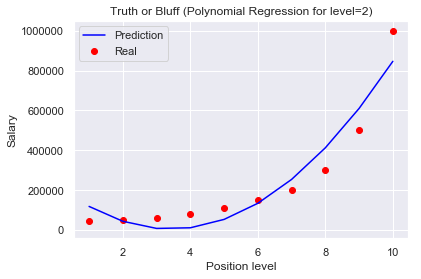

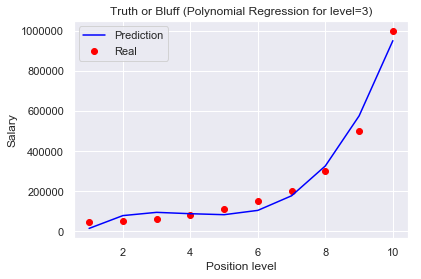

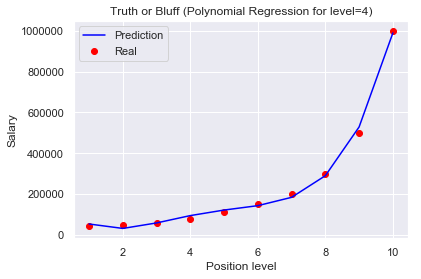

In [20]:
# Visualising the Polynomial Regression results
_=plt.scatter(X, y, color='red', label='Real')
_=plt.plot(X, y_hat_2, color='blue', label='Prediction')
_=plt.title('Truth or Bluff (Polynomial Regression for level=2)')
_=plt.xlabel('Position level')
_=plt.legend(loc='best')
_=plt.ylabel('Salary')
plt.show();

_=plt.scatter(X, y, color='red', label='Real')
_=plt.plot(X, y_hat_3, color='blue', label='Prediction')
_=plt.title('Truth or Bluff (Polynomial Regression for level=3)')
_=plt.xlabel('Position level')
_=plt.ylabel('Salary')
_=plt.legend(loc='best')
plt.show();

_=plt.scatter(X, y, color='red', label='Real')
_=plt.plot(X, y_hat_4, color='blue', label='Prediction')
_=plt.title('Truth or Bluff (Polynomial Regression for level=4)')
_=plt.xlabel('Position level')
_=plt.ylabel('Salary')
_=plt.legend(loc='best')
plt.show();

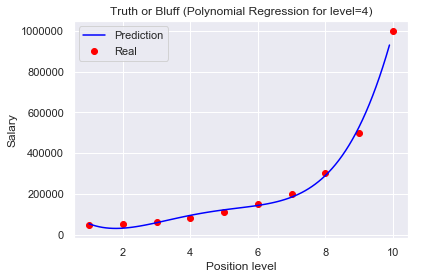

In [21]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

_=plt.scatter(X, y, color='red', label='Real')
_=plt.plot(X_grid, lin_regressor_4.predict(poly_reg_4.fit_transform(X_grid)), color='blue', label='Prediction')
_=plt.title('Truth or Bluff (Polynomial Regression for level=4)')
_=plt.xlabel('Position level')
_=plt.ylabel('Salary')
_=plt.legend(loc='best')
plt.show();

In [22]:
# Predicting a new result with Linear Regression and Polynomial Regression
print('linear regression for 6.5     : ', lin_regressor_1.predict([[6.5]]))
print('polynomial regression for 6.5 : ', lin_regressor_4.predict(poly_reg_4.fit_transform([[6.5]])))

linear regression for 6.5     :  [330378.78787879]
polynomial regression for 6.5 :  [158862.45265153]
